<a href="https://colab.research.google.com/github/bforsbe/SK2534/blob/main/Hand_in_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 1: ENTHALPY

### Task_1_SI2720.py

The code below is adapted from `Task_1_SI2720.py` (with minor updates for compatibility with newer library versions).
In Google Colab, the notebook is divided into cells. Each cell can contain text (like this one) or code. You can edit the code inside a code cell just like in any text/code editor. To run it, select the cell and press Shift+Enter, or click the small "play" button in the top-left corner of the cell.

Computing the distribution of states predicted by Bottzmann equation ... 
boltzmann constant is 8.6e-05[eV/K]
temperature is 310[K]
number of states is 3
Done - showing resulting plot. Close the plot to end program.


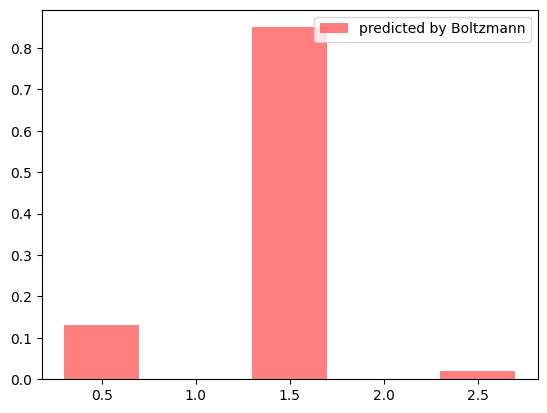

Computing the distribution of states predicted by Bottzmann equation ... 
boltzmann constant is 8.6e-05[eV/K]
temperature is 310[K]
number of states is 3
Performing random sampling ...
The probabilites of the states are
[0.1302565  0.84977739 0.01996612]
And the thresholds of the states we will use are
[0.1302565  0.98003388 1.        ]
Done - showing resulting plot. Close the plot to end program.


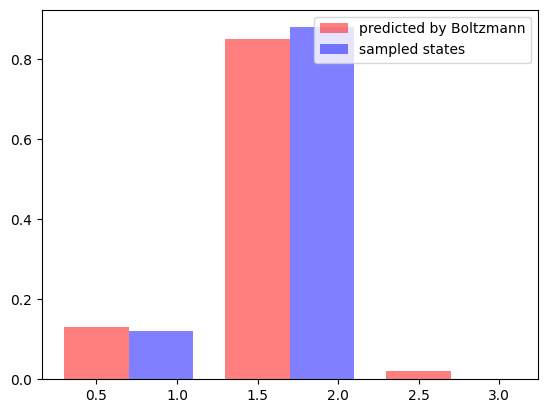

In [3]:
# @title
#!python

# A first note if you are not used to Python programs:
# What you see immediately below is a definition of the function compute_distribution
# which is called from further down.
# So scroll down until you see the note that --- the program starts here ---.
# And follow from there.

#import handy python modules
import numpy as np
import pylab as plt

# This is a function which takes a list of energies, one for each state
# in a system, and samples it for the required number of observations.
def compute_distribution(stateEnergies, k=8.6e-5, T=310, random_sampling=False, numberOfObservations=50):

    print("Computing the distribution of states predicted by Bottzmann equation ... ")
    # The temperature and boltzmann constant in [eV/K] & [K];
    # these paramaters affect the "Sampled states" in the plot
    print("boltzmann constant is "+str(k)+"[eV/K]")
    print("temperature is "+str(T)+"[K]")

    # Count how many state-energies were provided, that is how many states to use
    Nstates = len(stateEnergies)
    print("number of states is "+str(Nstates))

    # Create an array to hold the probability interval (ceiling) for each state
    Probs = np.zeros(Nstates)

    # Begin by setting the Partition Function to zero
    PartitionFunction = 0.0

    # Go through all state energies in the input
    for i in np.arange(Nstates):
        # calculate the boltzmann factor
        Probs[i]            =                     np.exp(-stateEnergies[i]/(k*T))
        # And keep adding all boltzmann factors to the Partion Function
        PartitionFunction   = PartitionFunction + np.exp(-stateEnergies[i]/(k*T))

    # When all Boltzmann factors have been calulated and the Partition Function is
    # complete, we finish the probabilities by dividing by the Partition Function,
    # as Boltzmann statistics instructs us to ("Z" in Eq. 1 in the lab instruction)
    Probs = Probs /  PartitionFunction

    plt.bar(np.arange(Nstates)+0.5, Probs, width=0.4, fc='red', alpha=0.5, label='predicted by Boltzmann')

    if random_sampling==True:
        print("Performing random sampling ...")
        # Now we see each probability as a part of the line between 0 and 1. If the
        # probability of the first state "A" is e.g. 0.23, then all numbers between
        # 0.00 and 0.23 belong to state A. If the next state "B" has probability 0.31,
        # then all numbers between 0.23 and 0.54 (0.23+0.31) belong to state B, and
        # so on. An easy way to find these thresholds is to use a cumulative sum, where
        # each element in the array is the sum of all previous elements.
        ProbThresholds=np.cumsum(Probs)
        # This information is printed by the statements below

        print("The probabilites of the states are")
        print(Probs)
        print("And the thresholds of the states we will use are")
        print(ProbThresholds)

        # Now we will generate random numbers
        # as many as determined by number of observations parameter
        # and assign each to a state.

        # Make an array to fill with state assignments
        states = np.zeros(numberOfObservations)
        states = states.astype(int)

        # Make as many observations as required
        for i in np.arange(numberOfObservations):
            # Make a random number this observation
            current = np.random.rand()

            # Test if the current number is above the threshold for a state.
            # as long as it IS, keep testing the next state.
            while current>ProbThresholds[states[i]]:
                    states[i]+=1

        # We now have a number of state assignments, as many as required. Let's create a plot
        # of them in histogram, so that the first state is "1", then "2", and so on.
        bins=np.arange(Nstates+1)+0.5
        y, bin_edges = np.histogram(states + 1, bins=bins, density=True)

        plt.bar(np.arange(len(energies))+0.9, y, width=0.4, fc='blue',alpha=0.5, label='sampled states')
    print("Done - showing resulting plot. Close the plot to end program.")
    plt.legend()
    plt.show()


#  --------------- THE PROGAM STARTS HERE, AND USES THE ABOVE FUNCTION -----------------

# Create a number of energy-states, in this case three of them
# For example, energies=[-0.30, -0.35, -0.25]
# But could be any favorable or unfavorable energy

energies=[-0.30, -0.35, -0.25]

#   FIRST, LET'S PLOT THE PREDICTED BOLTZMANN DISTRIBUTION
# Change temperature T (in kelvin) if needed
compute_distribution(energies,T=310,random_sampling=False)

#   THEN, LET'S SAMPLE STATES AND SEE IF WE CAN MATCH THE EXPECTED BOLTZMANN DISTRIBUTION
# Set the number of observations of the system
Nsteps = 50

# Randomize numbers to see if it mathces the predicted distribution.
compute_distribution(energies,T=310,random_sampling=True,numberOfObservations=Nsteps)


# PART 2: ENTROPY

### Running the first simulation using `mcrun.py`

In this task, you will work with code from the files `mcrun.py` and `Task_2_SI2720.py`. An additional learning goal for this hand-in task is to practice using command-line tools. For `mcrun.py`, you are encouraged to run it through Google Colab’s built-in terminal interface rather than executing it directly as python code (though you are free to choose either approach).

To do so, we first need to download `mcrun.py` and `Task_2_SI2720.py`. Click on the "Terminal" tab at the bottom of the page and run the following command in the opened window:



```
wget https://raw.githubusercontent.com/Talianash/SK2534_TS/main/mcrun.py
```

The tool wget is a standard command-line program that downloads files from the web when given a link.

Now you can continue using the teminal tab just as the usual Linux/MacOS terminal as described in the main `Hand_in_1_2022.pdf` file.

**Google Colab hints:**
* You can resize the terminal window using the sliders on the page (or even temporarily hide the notebook tab completely if you don’t need it).
* Google Colab also lets you open and edit text files directly in new tabs. For example, after creating the file `enth.dat` with the `touch` command in the terminal, click the folder icon on the left sidebar, then click on enth.dat. A text editor tab will open where you can view and edit the file.

## Visualizing simulation results
The code below is adapted from `Task_2_SI2720.py`. Run it in the same way you executed the code from `Task_1_SI2720.py` in Part 1.

In [2]:
#!python

############ IMPORTS ############

import numpy as np
import argparse
import matplotlib.pyplot as plt


############ CALCS ############

traj = np.loadtxt("traj.dat", dtype=int)
mstates = np.loadtxt("enth.dat")
T = 300.
N = len(mstates)

#Count microstate occupation
bins = np.bincount(traj)
simulation_dist = np.zeros(4)
prediction_dist = np.zeros(4)

#Correction factor
C = 0

simulation_dist[0] = sum(bins[0:3])
simulation_dist[1] = bins[3]
prediction_dist[0] = np.exp(-(-1.)/T+C)
prediction_dist[1] = np.exp(-(-200.)/T)

#Normalize the distributions
simulation_dist = simulation_dist / float(sum(simulation_dist))
prediction_dist = prediction_dist / float(sum(prediction_dist))

############ PLOT ############


#Append zeros at missing elements
simulation_dist = np.concatenate((simulation_dist,np.zeros(N-len(simulation_dist))))

#Setup plot data
ind = np.arange(N) # the x locations for the groups
width = 0.35 # the width of the bars

plt.bar(ind, prediction_dist, width, color='b',alpha=0.5, label='Predicted')
plt.bar(ind+width, simulation_dist, width, color='g',alpha=0.5, label='Simulation')

#Add legend
plt.legend(loc=0)

#Remove ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

print("Done - showing resulting plot. Close the plot to end program.")
plt.show()

FileNotFoundError: traj.dat not found.